In [ ]:
import pandas as pd
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
from src.data_loader import load_data_assets

aapl = load_data_assets('AAPL')

/tmp/ipykernel_75/2393028593.py:1: FutureWarning: YF.download() has changed argument auto_adjust default to True
  aapl = yf.download("AAPL", start="2013-01-01", end="2023-12-31")
[*********************100%***********************]  1 of 1 completed


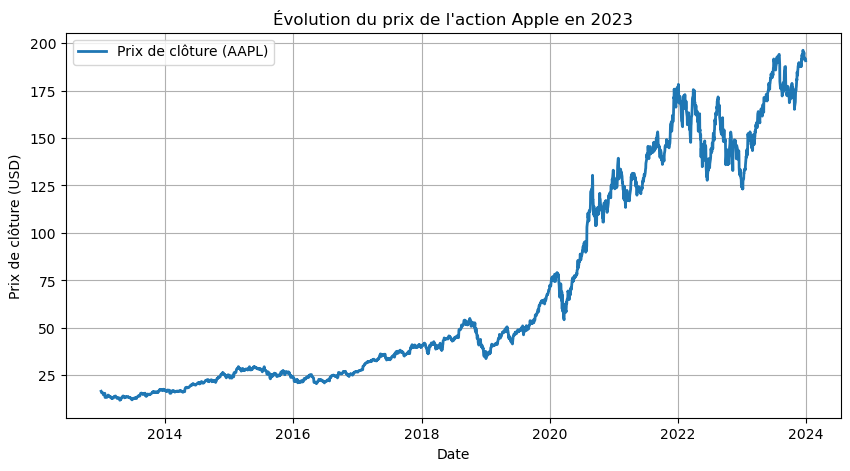

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(aapl.index, aapl["Close"], label="Prix de clôture (AAPL)", linewidth=2)

# Ajouter les titres et labels
plt.title("Évolution du prix de l'action Apple en 2023")
plt.xlabel("Date")
plt.ylabel("Prix de clôture (USD)")
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
amzn = load_data_assets('AMZN')

/tmp/ipykernel_75/3873599671.py:1: FutureWarning: YF.download() has changed argument auto_adjust default to True
  amzn = yf.download("AMZN", start="2013-01-01", end="2023-12-31")
[*********************100%***********************]  1 of 1 completed


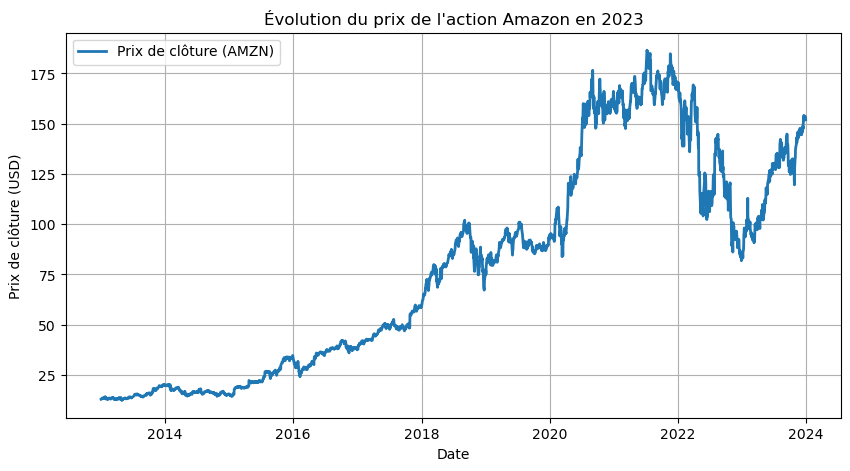

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(amzn.index, amzn["Close"], label="Prix de clôture (AMZN)", linewidth=2)

# Ajouter les titres et labels
plt.title("Évolution du prix de l'action Amazon en 2023")
plt.xlabel("Date")
plt.ylabel("Prix de clôture (USD)")
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
msft = load_data_assets("MSFT")

/tmp/ipykernel_75/1273955280.py:1: FutureWarning: YF.download() has changed argument auto_adjust default to True
  msft = yf.download("MSFT", start="2013-01-01", end="2023-12-31")
[*********************100%***********************]  1 of 1 completed


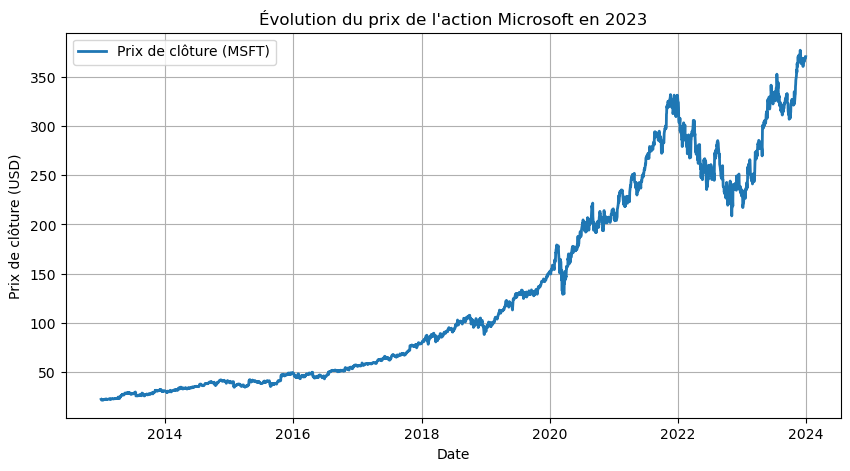

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(msft.index, msft["Close"], label="Prix de clôture (MSFT)", linewidth=2)

# Ajouter les titres et labels
plt.title("Évolution du prix de l'action Microsoft en 2023")
plt.xlabel("Date")
plt.ylabel("Prix de clôture (USD)")
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
from src.data_loader import compute_daily_return

Rendement_Msft = compute_daily_return(msft)
Rendement_Msft

In [ ]:
from src.data_loader import compute_portfolio_returns

stocks = {
    "MSFT": msft,
    "AMZN": amzn,
    "AAPL": aapl
}
rendement_portefeuille = compute_portfolio_returns(stocks)
rendement_portefeuille

,Close,Close,Close,moyenne
Date,,,,
2013-01-02,NaN,NaN,NaN,NaN
2013-01-03,-0.013396,0.004547,-0.012622,-0.007157
2013-01-04,-0.018716,0.002592,-0.027854,-0.014659
2013-01-07,-0.001870,0.035925,-0.005882,0.009391
2013-01-08,-0.005245,-0.007748,0.002691,-0.003434
...,...,...,...,...
2023-12-22,0.002784,-0.002730,-0.005547,-0.001831
2023-12-26,0.000213,-0.000065,-0.002841,-0.000898
2023-12-27,-0.001575,-0.000456,0.000518,-0.000504


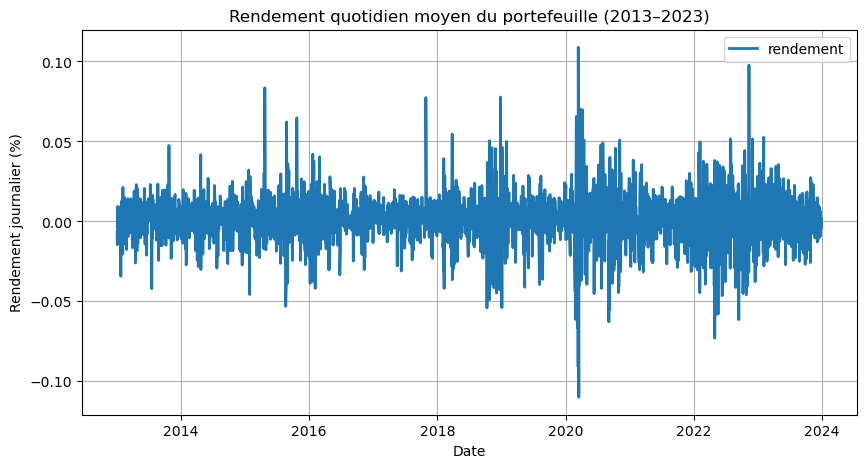

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(aapl.index, rendement_portefeuille["moyenne"], label="rendement", linewidth=2)

# Ajouter les titres et labels
plt.title("Rendement quotidien moyen du portefeuille (2013–2023)")
plt.xlabel("Date")
plt.ylabel("Rendement journalier (%)")
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
from src.data_loader import load_benchmark


sp500 = load_benchmark()
sp500

/tmp/ipykernel_75/296495424.py:1: FutureWarning: YF.download() has changed argument auto_adjust default to True
  sp500 = raw_data = yf.download (tickers = "^GSPC", start = "2013-01-01",
[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Date,,,,,
2013-01-02,1462.420044,1462.430054,1426.189941,1426.189941,4202600000
2013-01-03,1459.369995,1465.469971,1455.530029,1462.420044,3829730000
2013-01-04,1466.469971,1467.939941,1458.989990,1459.369995,3424290000
2013-01-07,1461.890015,1466.469971,1456.619995,1466.469971,3304970000
2013-01-08,1457.150024,1461.890015,1451.640015,1461.890015,3601600000
...,...,...,...,...,...
2023-12-22,4754.629883,4772.939941,4736.770020,4753.919922,3046770000
2023-12-26,4774.750000,4784.720215,4758.450195,4758.859863,2513910000
2023-12-27,4781.580078,4785.390137,4768.899902,4773.450195,2748450000


In [ ]:
Rendement_sp500 = pd.DataFrame((sp500["Close"] / sp500["Close"].shift(1)) - 1)


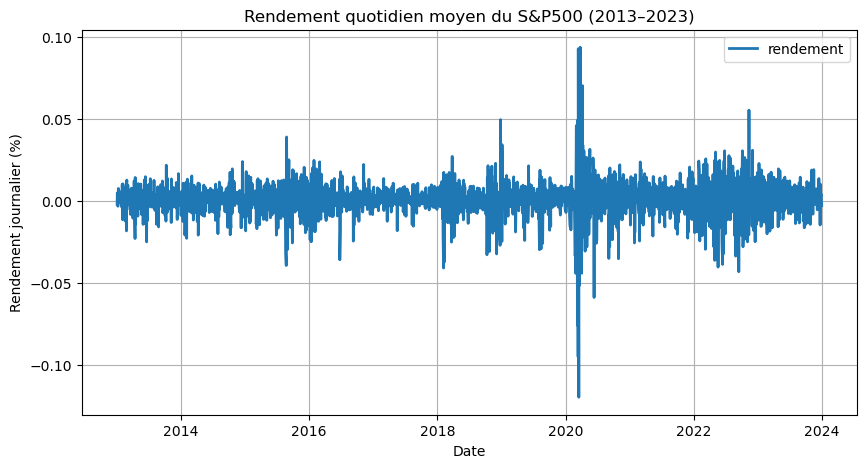

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(Rendement_sp500.index, Rendement_sp500["Close"], label="rendement", linewidth=2)

# Ajouter les titres et labels
plt.title("Rendement quotidien moyen du S&P500 (2013–2023)")
plt.xlabel("Date")
plt.ylabel("Rendement journalier (%)")
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
comparaison = pd.DataFrame({'sp500': Rendement_sp500['Close'].values , 'portefeuille': rendement_portefeuille['moyenne'].values })

comparaison['resultat'] = comparaison['portefeuille'] > comparaison['sp500']
comparaison

,sp500,portefeuille,resultat
0,NaN,NaN,False
1,-0.002086,-0.007157,False
2,0.004865,-0.014659,False
3,-0.003123,0.009391,True
4,-0.003242,-0.003434,False
...,...,...,...
2763,0.001660,-0.001831,False
2764,0.004232,-0.000898,False
2765,0.001430,-0.000504,False
2766,0.000370,0.001907,True


In [ ]:
#Normalization des actions
sp500_norm = pd.DataFrame({'Close' : sp500['Close'] / sp500['Close'][0]})

amzn_norm = amzn['Close'] / amzn['Close'][0]
appl_norm = aapl['Close'] / aapl['Close'][0]
msft_norm = msft['Close'] / msft['Close'][0]

portefeuille_norm = pd.concat([amzn_norm, appl_norm, msft_norm],axis=1).reindex(amzn_norm.index)

portefeuille_norm['moyenne'] = portefeuille_norm.mean(axis = 1)



/tmp/ipykernel_75/2243656821.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  sp500_norm = pd.DataFrame({'Close' : sp500['Close'] / sp500['Close'][0]})
/tmp/ipykernel_75/2243656821.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  amzn_norm = amzn['Close'] / amzn['Close'][0]
/tmp/ipykernel_75/2243656821.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  appl_norm = aapl['Close'] / aapl['Close'][0]
/tmp/ipykernel_75/2243656821.

In [ ]:


portefeuille = pd.concat([amzn['Close'], aapl['Close'], msft['Close']],axis=1).reindex(amzn.index)



In [ ]:
#Rolling 20 jours
port_rolling_var = portefeuille.rolling(window=20).var().mean(axis = 1)
port_rolling_mean = portefeuille.rolling(window=20).mean().mean(axis = 1)

cv_rolling_port = port_rolling_var / port_rolling_mean

sp_rolling_var = sp500_norm['Close'].rolling(window=20).var()
sp_rolling_mean = sp500_norm['Close'].rolling(window = 20).mean()

cv_rolling_sp = sp_rolling_var / sp_rolling_mean

In [ ]:

#Volatilité apres 20 jours
#port_var = portefeuille_norm.groupby(np.arange(len(portefeuille_norm)) // 20).var().mean(axis = 1)
#port_mean = portefeuille_norm.groupby(np.arange(len(portefeuille)) // 20).mean().mean(axis = 1)

#cv_port = port_var / port_mean

#sp_var = sp500_norm['Close'].groupby(np.arange(len(sp500_norm)) // 20).var()
#sp_mean = sp500_norm['Close'].groupby(np.arange(len(sp500_norm)) // 20).mean()

#cv_sp = sp_var / sp_mean
 


In [ ]:
#Sharpe ratio de 20 jours

#Risk free rate
rf_ticker = "^TNX"
df_rf = yf.download(rf_ticker, start='2013-01-01', end='2023-12-31')['Close']

rf_tout = df_rf.rolling(window = 20).mean()/250

#250 = nombre de jours ou la bourse est ouverte

#Rendement des actions
 

/tmp/ipykernel_75/2395020809.py:5: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df_rf = yf.download(rf_ticker, start='2013-01-01', end='2023-12-31')['Close']
[*********************100%***********************]  1 of 1 completed


In [ ]:
#Rendement après 20 jours

def block_return(block):
    return (block.iloc[-1] - block.iloc[0]) / block.iloc[0]

r_port = portefeuille.rolling(window = 20).apply(block_return)

r_port_mean = r_port.mean(axis = 1)

r_sp500 = sp500['Close'].rolling(window = 20).apply(block_return)

#Sharpe ratio

#rp-rf/var

#portefeuille
sharpe_port = (r_port_mean - rf_tout['^TNX'])/cv_rolling_port

sharpe_sp500 = (r_sp500 - rf_tout['^TNX'])/cv_rolling_sp

In [ ]:
#Covariance de 5 jours
df = pd.concat([rendement_portefeuille['moyenne'], Rendement_sp500['Close']], axis=1)

# Create block grouping index
#groups = np.arange(len(df)) // 20

#cov_by_block = df.groupby(groups).apply(lambda g: g['moyenne'].cov(g['Close']))

cov_by_block = df['moyenne'].rolling(window=20).cov(df['Close'])

cov_by_block


Date
2013-01-02         NaN
2013-01-03         NaN
2013-01-04         NaN
2013-01-07         NaN
2013-01-08         NaN
                ...   
2023-12-22    0.000027
2023-12-26    0.000028
2023-12-27    0.000028
2023-12-28    0.000026
2023-12-29    0.000028
Length: 2768, dtype: float64

In [ ]:
#rendement 21-ème jour

r_port_21 = portefeuille.rolling(window = 21).apply(block_return)

r_port_mean_21 = r_port.mean(axis = 1)

r_sp500_21 = sp500['Close'].rolling(window = 21).apply(block_return)




In [ ]:
#final df

df_final = pd.DataFrame({'cv_port':cv_rolling_port , 'cv_sp500': cv_rolling_sp, 'sharpe_port' : sharpe_port, 'sharpe_sp500' : sharpe_sp500, 'covariance' :cov_by_block })

df_final ['result'] = (r_port_mean_21 > r_sp500_21).astype(int)

df_final = df_final.dropna()

df_final

,cv_port,cv_sp500,sharpe_port,sharpe_sp500,covariance,result
Date,,,,,,
2013-01-31,0.023069,0.000128,-2.138233,148.378093,-1.529762e-06,0
2013-02-01,0.022372,0.000137,-1.414612,176.860872,1.855088e-07,0
2013-02-04,0.022863,0.000132,-2.653727,117.780954,1.508691e-05,0
2013-02-05,0.021923,0.000131,-1.727617,224.681751,2.876700e-05,0
2013-02-06,0.020357,0.000119,-2.129064,230.001600,2.871292e-05,0
...,...,...,...,...,...,...
2023-12-22,0.047300,0.000971,-0.010572,29.252031,2.736937e-05,0
2023-12-26,0.045911,0.001025,-0.093248,31.122368,2.765002e-05,0
2023-12-27,0.039592,0.001059,0.054756,32.564460,2.789738e-05,0


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Suppose df is your dataframe
# 'result' is your 0/1 column
X = df_final.drop(columns=['result'])
y = df_final['result']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]  # probability of class 1

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))



Accuracy: 0.8
              precision    recall  f1-score   support

           0       0.84      0.59      0.69       212
           1       0.78      0.93      0.85       338

    accuracy                           0.80       550
   macro avg       0.81      0.76      0.77       550
weighted avg       0.81      0.80      0.79       550

